Для отработки навыков работы с python и с временными рядами.

Тестирование стратегии торговли - пересечение скользящих средних.
Когда быстрая сс пересекает медленную вверх - покупаем.
Когда быстрая сс пересекает медленную вниз - продаем.
Стратегия предполагает, что всегда есть открытая позиция.

In [269]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [270]:
df = pd.read_csv('SBER_100101_211231.csv')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  3016 non-null   object 
 1   <PER>     3016 non-null   object 
 2   <DATE>    3016 non-null   int64  
 3   <TIME>    3016 non-null   int64  
 4   <OPEN>    3016 non-null   float64
 5   <HIGH>    3016 non-null   float64
 6   <LOW>     3016 non-null   float64
 7   <CLOSE>   3016 non-null   float64
 8   <VOL>     3016 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 212.2+ KB


In [272]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,20100111,0,86.56,88.17,85.51,86.69,148661237
1,SBER,D,20100112,0,86.55,86.77,84.90,85.00,130276079
2,SBER,D,20100113,0,84.40,87.23,84.10,86.61,128684773
3,SBER,D,20100114,0,87.50,87.87,86.75,87.55,111263614
4,SBER,D,20100115,0,87.47,88.67,87.16,88.15,142060148
...,...,...,...,...,...,...,...,...,...
3011,SBER,D,20211224,0,293.00,294.18,289.00,293.89,37669750
3012,SBER,D,20211227,0,294.79,296.00,293.37,295.68,35728530
3013,SBER,D,20211228,0,295.84,297.55,294.18,295.00,37853360
3014,SBER,D,20211229,0,295.05,295.55,291.33,293.51,37668260


In [273]:
#"переформатируем" столбец с датой 
df['<DATE>'] = df['<DATE>'].map(lambda x: pd.to_datetime(x, format='%Y%m%d'))


In [274]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,2010-01-11,0,86.56,88.17,85.51,86.69,148661237
1,SBER,D,2010-01-12,0,86.55,86.77,84.90,85.00,130276079
2,SBER,D,2010-01-13,0,84.40,87.23,84.10,86.61,128684773
3,SBER,D,2010-01-14,0,87.50,87.87,86.75,87.55,111263614
4,SBER,D,2010-01-15,0,87.47,88.67,87.16,88.15,142060148
...,...,...,...,...,...,...,...,...,...
3011,SBER,D,2021-12-24,0,293.00,294.18,289.00,293.89,37669750
3012,SBER,D,2021-12-27,0,294.79,296.00,293.37,295.68,35728530
3013,SBER,D,2021-12-28,0,295.84,297.55,294.18,295.00,37853360
3014,SBER,D,2021-12-29,0,295.05,295.55,291.33,293.51,37668260


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   <TICKER>  3016 non-null   object        
 1   <PER>     3016 non-null   object        
 2   <DATE>    3016 non-null   datetime64[ns]
 3   <TIME>    3016 non-null   int64         
 4   <OPEN>    3016 non-null   float64       
 5   <HIGH>    3016 non-null   float64       
 6   <LOW>     3016 non-null   float64       
 7   <CLOSE>   3016 non-null   float64       
 8   <VOL>     3016 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 212.2+ KB


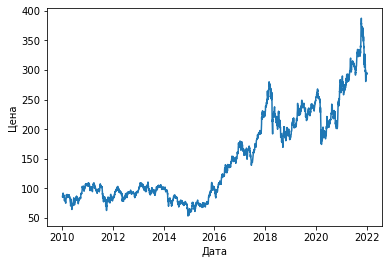

In [276]:
plt.plot(df['<DATE>'], df['<CLOSE>'])
plt.ylabel('Цена')
plt.xlabel('Дата')
plt.show()

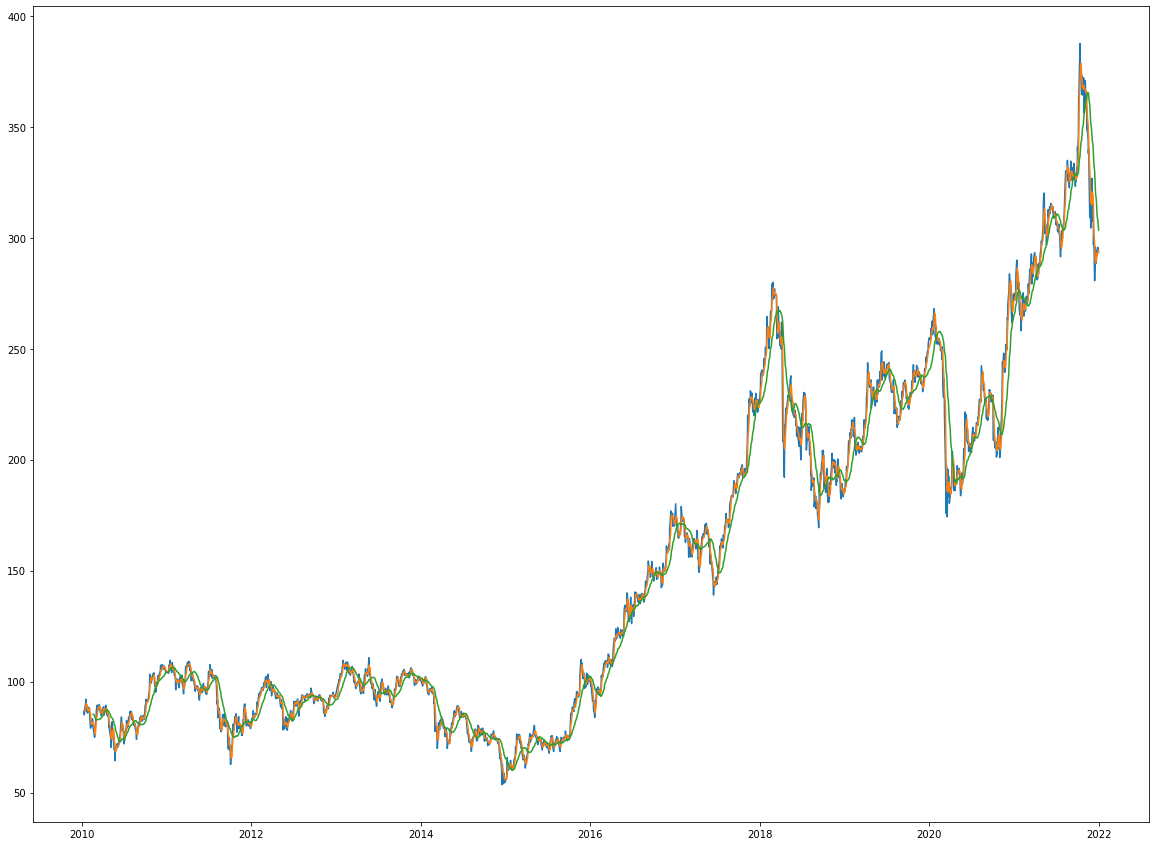

In [277]:
#быстрая скользящая средняя
df['small'] = df['<CLOSE>'].rolling(window=5, center=False).mean()

#медленная скользящая средняя
df['big'] = df['<CLOSE>'].rolling(window=30, center=False).mean()

#на графике
plt.figure(figsize=(20, 15))
plt.plot(df['<DATE>'], df['<CLOSE>'])
plt.plot(df['<DATE>'], df['small'])
plt.plot(df['<DATE>'], df['big'])


plt.show()

In [278]:
#начальный депозит
start_depo = 10000
#депозит
depo = start_depo
#кол-во для сделки
amount = 0
#депозит с накоплением
depo_accum = [depo]
#счетчики операций
count_buy = 0
count_sell = 0
#счетчики положительных операций
count_buy_positive = 0
count_sell_positive = 0
#предыдущая цена сделки
trade_pre = 0
#результат сделки
result = 0


In [280]:
position = 'Not position'
for i in df.index[1:]:
    s = df['small'][i]          #значение текущей быстрой скользящей
    b = df['big'][i]            #значение текущей медленной скользящей  
    s_pre = df['small'][i-1]    #значение предыдущей быстрой скользящей
    b_pre = df['big'][i-1]      #значение предыдущей медленной скользящей
    date = df['<DATE>'][i]      #текущая дата 
    #trade = df['<CLOSE>'][i]    #цена для сделки 
    
    # пересечение вверх и нет открытой позиции
    if s > b and s_pre < b_pre and position == 'Not position':
        #покупаем
        position = 'Buy'
        #счетчик покупок
        count_buy += 1
        #цена покупки
        trade = df['<CLOSE>'][i]
        #кол-во для покупки
        amount = depo // trade
        print(date, position, amount)

    
    # пересечение вверх и есть открытая шорт-позиция 
    if s > b and s_pre < b_pre and position == 'Sell':
        #закрываем открытый шорт
        result = (trade - df['<CLOSE>'][i])*amount
        depo += result
        depo_accum.append(depo)
        #счетчик удачных продаж
        if result>0:
            count_sell_positive += 1
        #покупаем
        position = 'Buy'
        #счетчик покупок
        count_buy += 1
        #цена покупки
        trade = df['<CLOSE>'][i]
        #кол-во для покупки
        amount = depo // trade
        print(date, position, result, 'разворот', amount, trade)  

    
    # пересечение вниз и нет открытой позиции
    if s < b and s_pre > b_pre and position == 'Not position':
        #продаем
        position = 'Sell'
        #счетчик продаж
        count_sell += 1
        #цена продажи
        trade = df['<CLOSE>'][i]
        #кол-во для продажи
        amount = depo // trade
        print(date, position, amount, trade)

    
    # пересечение вверх и есть открытая лонг позиция
    if s < b and s_pre > b_pre and position == 'Buy':
        #закрываем открытый лонг
        result = (df['<CLOSE>'][i] - trade)*amount
        depo += result
        depo_accum.append(depo)   
        #счетчик удачных покупок
        if result>0:
            count_buy_positive += 1 
        #продаем
        position = 'Sell'
        #счетчик продаж
        count_sell += 1
        #цена продажи
        trade = df['<CLOSE>'][i]
        #кол-во для продажи
        amount = depo // trade
        print(date, position, result, 'разворот', amount, trade)  



2010-03-05 00:00:00 Buy 114.0
2010-04-13 00:00:00 Sell 0.0 разворот 114.0 87.2
2010-04-15 00:00:00 Buy -239.39999999999935 разворот 109.0 89.3
2010-04-21 00:00:00 Sell -414.1999999999997 разворот 109.0 85.5
2010-06-16 00:00:00 Buy 958.1100000000007 разворот 134.0 76.71
2010-07-06 00:00:00 Sell -1.3399999999987813 разворот 134.0 76.7
2010-07-08 00:00:00 Buy -64.32000000000053 разворот 132.0 77.18
2010-08-13 00:00:00 Sell 465.9599999999983 разворот 132.0 80.71
2010-09-08 00:00:00 Buy -194.04000000000173 разворот 127.0 82.18
2010-11-17 00:00:00 Sell 1907.5399999999995 разворот 127.0 97.2
2010-11-24 00:00:00 Buy -521.9699999999999 разворот 117.0 101.31
2011-01-25 00:00:00 Sell 546.3900000000002 разворот 117.0 105.98
2011-01-27 00:00:00 Buy -205.91999999999894 разворот 113.0 107.74
2011-02-02 00:00:00 Sell -388.71999999999974 разворот 113.0 104.3
2011-03-23 00:00:00 Buy 361.6000000000003 разворот 120.0 101.1
2011-04-20 00:00:00 Sell 208.8000000000011 разворот 120.0 102.84
2011-06-10 00:00:0

In [281]:
#результаты работы стратегии 

#продолжительность стратегии в днях
period = int((pd.to_datetime(df['<DATE>'][-1:],format='%Y%m%d')  - pd.to_datetime(df['<DATE>'][0],format='%Y%m%d')).dt.days)
#доходность стратегии в %% годовых
profitability = round( (depo-start_depo)/start_depo*100/int(period)*365, 2)

print (' Результат стратегии скользящие средние', 
       '\n Начальный депозит: ', start_depo,
       '\n Депозит: ', round(depo),
       '\n Профит: ', round(depo-start_depo),
       '\n Кол-во операций buy: ', count_buy, ', из них положительных: ', 
       count_buy_positive, '(', round(count_buy_positive/count_buy*100, 1)  ,'%)'
       '\n Кол-во операций sell:', count_sell, ', из них положительных: ',
       count_sell_positive, '(', round(count_sell_positive/count_sell*100, 1)  ,'%)'
       '\n Продолжительность работы по стратегии: ', period, 'дней',
       '\n Доходность стратегии: ', profitability, '% годовых'
      
      )

 Результат стратегии скользящие средние 
 Начальный депозит:  10000 
 Депозит:  17360 
 Профит:  7360 
 Кол-во операций buy:  69 , из них положительных:  30 ( 43.5 %)
 Кол-во операций sell: 69 , из них положительных:  19 ( 27.5 %)
 Продолжительность работы по стратегии:  4371 дней 
 Доходность стратегии:  6.15 % годовых


<function matplotlib.pyplot.show(close=None, block=None)>

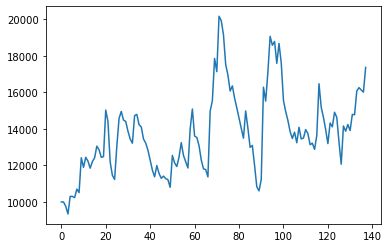

In [283]:
#Кривая депозита
plt.plot(depo_accum)
plt.show

In [284]:
#сколько принесла бы стратегия bue_and_hold 
start = df['<OPEN>'][0] 
finish = df['<OPEN>'][len(df)-1]
amount_bue_and_hold = start_depo // start
bue_and_hold = (finish - start) * amount_bue_and_hold
#доходность bue_and_hold в %% годовых
profitability_bue_and_hold = round( (bue_and_hold)/start_depo*100/int(period)*365, 2)

print ('Результат bue_and_hold:', round(bue_and_hold), 'Количество: ', amount_bue_and_hold, 'шт.'
      'Доходность: ', profitability_bue_and_hold, '% годовых'
      )


Результат bue_and_hold: 23811 Количество:  115.0 шт.Доходность:  19.88 % годовых
